In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 판례 데이터를 불러옵니다.
df = pd.read_csv(r'C:\Users\bluecom011\Desktop\Sesac_AI\7주차\02.07\reason2_text.csv')

# TF-IDF 벡터화를 위한 객체 생성
vectorizer = TfidfVectorizer()

# 텍스트 데이터를 TF-IDF 행렬로 변환
tfidf_matrix = vectorizer.fit_transform(df['str'])

# 사용자 입력을 받습니다.
user_question = input("질문을 입력하세요: ")

# 사용자 입력을 TF-IDF 벡터로 변환
user_tfidf = vectorizer.transform([user_question])

# TF-IDF 벡터 간의 코사인 유사도를 계산하여 유사한 판례를 찾습니다.
similarities = cosine_similarity(user_tfidf, tfidf_matrix)

# 코사인 유사도가 높은 순으로 정렬하여 상위 5개 판례의 인덱스와 유사도를 찾습니다.
most_similar_indices = similarities.argsort(axis=1)[0][-5:][::-1]
most_similar_values = similarities[0, most_similar_indices]

# 상위 5개 유사한 판례와 해당 유사도를 출력합니다.
print("상위 5개 유사한 판례 및 유사도:")
for idx, sim_value in zip(most_similar_indices, most_similar_values):
    recommended_case = df.loc[idx]
    print("유사도:", sim_value)
    print(recommended_case)


상위 5개 유사한 판례 및 유사도:
유사도: 0.6145502379448009
이유       1. 기초사실<br/>  가. 피고의 토지 매수 및 분할<br/>   1) 피고는 ...
str      기초 사실 피고 토지 매수 및 분할 피고 소외 안양시 주소 생략 이하 동의 각 토지...
사건종류명                                                   민사
판례내용     【원고, 피항소인】 원고 (소송대리인 법무법인 혜 담당변호사 김대원)<br/>【피고...
Name: 1541, dtype: object
유사도: 0.6033881201515329
이유         상고이유를 판단한다. <br/>  1. 원심은, 피고가 1986. 10. 16....
str      상고 이유 판단 원심 피고 경 이 사건 토지 도로로 점유 사용 토지 사부 사정 명의...
사건종류명                                                   민사
판례내용     【원고, 피상고인】 원고 (소송대리인 법무법인 감천 담당변호사 이종승 외 4인)<b...
Name: 1720, dtype: object
유사도: 0.6009292494738468
이유         1. 관련 법리<br/>토지의 소유자가 스스로 토지를 도로로 제공하여 인근 주민...
str      관련 법리 토지 소유자 스스로 토지 도로로 제공 인근 주민 일반 공중 무상 통행 토...
사건종류명                                                   민사
판례내용     【원고, 상고인】 원고 (소송대리인 법무법인 혜 담당변호사 김대원)<br/>【피고,...
Name: 1020, dtype: object
유사도: 0.5593487882442937
이유       1. 이 법원의 심판범위<br/>    제1심에서 원고들은 본소로써, ① 충남 청양...
str      이 법원 심판 범위 제 심 원고 로써 충남 청양읍 주소

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

# '사건종류명'이 '형사'인 데이터만 필터링
df_criminal_cases = df[df['사건종류명'] == '형사']

# TF-IDF 벡터화를 위한 객체 생성
vectorizer = TfidfVectorizer()

# '형사' 사건의 'str' 텍스트 데이터를 TF-IDF 행렬로 변환
tfidf_matrix_criminal = vectorizer.fit_transform(df_criminal_cases['str'])

# TF-IDF 행렬 간의 코사인 유사도 계산
cosine_similarities = cosine_similarity(tfidf_matrix_criminal)

# 네트워크 그래프 생성을 위한 준비
# G = nx.Graph()

# # 노드 추가 (각 노드는 '형사' 사건의 인덱스)
# for i in range(cosine_similarities.shape[0]):
#     G.add_node(i)

# # 엣지 추가 (코사인 유사도가 0.5 이상인 경우에만 추가)
# for i in range(cosine_similarities.shape[0]):
#     for j in range(i + 1, cosine_similarities.shape[0]):
#         if cosine_similarities[i, j] > 0.5:
#             G.add_edge(i, j, weight=cosine_similarities[i, j])

# # 네트워크 그래프 그리기
# plt.figure(figsize=(10, 10))
# pos = nx.spring_layout(G, seed=42)  # 노드의 배치를 위한 Spring layout
# nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', linewidths=1, font_size=12)
# plt.title('Criminal Cases Network Graph', fontsize=20)
# plt.show()


In [3]:
from sklearn.cluster import MiniBatchKMeans

# 클러스터의 개수를 정의합니다. 예시로 10개의 클러스터를 사용
k = 200

# MiniBatchKMeans 클러스터링 알고리즘을 초기화하고 학습시킵니다.
kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
df_criminal_cases['cluster'] = kmeans.fit_predict(tfidf_matrix_criminal)

# 클러스터링 결과 확인
df_criminal_cases.head()


c:\Users\bluecom011\miniconda3\envs\mp\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,이유,str,사건종류명,판례내용,cluster
1,상고이유를 판단한다.<br/> 1. 공소사실의 요지와 원심의 판단<br/> ...,상고 이유 판단 사실 요지 원심 판단 연장 근로 제한 위반 근로기준법 위반 공소 사...,형사,【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 변호사 신열...,65
3,상고이유를 판단한다.<br/> 1. 제1 상고이유에 관하여<br/> 가. 저...,상고 이유 판단 제 상고 이유 관 저작권법 보호 것 인간 사상 감정 말 문자 음 색...,형사,【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 법무법인 민...,170
10,상고이유를 판단한다. <br/> 1. 저작권법 제136조 제2항 제1호는 저작...,상고 이유 판단 저작권법 제 제 항 제 호 저작인격권 실연자 인격권 침해 저작자 실...,형사,【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 법무법인 린...,3
12,상고이유를 판단한다.<br/> 1. 사실오인 및 심리미진 여부<br/> 이 ...,상고 이유 판단 사실 오인 및 심리 미진 여부 이 부분 상고 이유 형사소송법 제 제...,형사,【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 변호사 박남...,63
13,상고이유를 판단한다.<br/> 1. 공직선거법 제60조의3 제1항 제5호(이하...,상고 이유 판단 공직선거법 제 제 항 제 호 이하 이 사건 조항 예비 후보자 허용 ...,형사,【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 법무법인 하...,130


In [53]:
# from sklearn.cluster import MiniBatchKMeans

# # 클러스터의 개수 설정
# k = 200

# # MiniBatchKMeans 모델 생성 및 학습
# kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
# kmeans.fit(tfidf_matrix_criminal)

# # 클러스터 중심을 기준으로 각 클러스터 내에서 가장 중요한 단어들의 인덱스 저장
# centers = kmeans.cluster_centers_.argsort()[:, ::-1]

# # TF-IDF 벡터화에서 사용된 단어들 가져오기
# terms = vectorizer.get_feature_names_out()

# # 새로운 데이터에 대한 TF-IDF 변환 수행
# request_transform = vectorizer.transform(df['str'])

# # 클러스터링 결과를 바탕으로 각 데이터 포인트가 속한 클러스터를 새로운 열 'cluster'에 저장
# df['cluster'] = kmeans.predict(request_transform)

# # 각 클러스터에 속한 데이터 포인트의 개수 확인하여 상위 5개 클러스터 출력
# top_clusters = df['cluster'].value_counts().head()
# top_clusters


12     1391
27       34
3        20
182      15
72       14
Name: cluster, dtype: int64

클러스터 12: 피고인, 소외, 사건, 판결, 원심, 사실, 행위, 이유, 판단, 피해자
클러스터 27: 근로기준법, 근로자, 임금, 사용자, 지급, 근로, 소외, 교회, 퇴직, 해고
클러스터 3: 피해자, 피고인, 진술, 사실, 사건, 판단, 원심, 범행, 신빙, 판결
클러스터 182: 압류, 채권, 추심명령, 추징, 집행, 항고, 예금, 명령, 시효중단, 효력
클러스터 29: 항고, 상소, 청구, 회복, 결정, 즉시, 집행유예, 취소, 정식, 기간

In [4]:
# 네트워크 그래프 생성 과정 수정 (인덱스 문제 해결)
G = nx.Graph()

# 'tfidf_matrix_criminal'의 각 행에 대해 반복
for index in range(tfidf_matrix_criminal.shape[0]):
    # 현재 판례의 'str' 컬럼 값을 라벨로 사용하여 노드 추가
    label = df_criminal_cases.iloc[index]['str'][:15]  # 라벨이 너무 길면 가독성이 떨어질 수 있으므로, 처음 15글자만 사용
    G.add_node(index, label=label)

    # 유사한 판례 찾기
    similar_indices = find_similar(tfidf_matrix_criminal, index, top_n=5)
    
    # 유사한 판례들과의 관계 추가 (코사인 유사도를 가중치로 사용)
    for similar_index in similar_indices:
        similarity_weight = cosine_similarities[index, similar_index]
        G.add_edge(index, similar_index, weight=similarity_weight)

# 처리 완료 시간 출력
print("Finish -- {} seconds --".format(time.time() - start_time))


NameError: name 'find_similar' is not defined

In [56]:
# 사용자 질문 가정
user_question = "매매"

# 사용자 질문의 TF-IDF 변환
user_tfidf = vectorizer.transform([user_question])

# 판례 데이터와의 코사인 유사도 계산
cosine_similarities = cosine_similarity(user_tfidf, tfidf_matrix_criminal).flatten()

# 가장 유사한 상위 5개 판례 선택
top_indices = cosine_similarities.argsort()[-5:][::-1]

# 네트워크 그래프 생성
G = nx.Graph()

# 사용자 질문 노드 추가
G.add_node("User Question", 질문=user_question)

# 유사한 판례 노드와 엣지 추가
for index in top_indices:
    case_content = df_criminal_cases.iloc[index]['str'][:15]  # 판례 내용의 첫 15글자
    case_type = df_criminal_cases.iloc[index]['사건종류명']
    G.add_node(case_content, 질문=case_content, 사건종류명=case_type)
    G.add_edge("User Question", case_content, weight=cosine_similarities[index])

# 이제 G에는 사용자의 질문과 가장 유사한 판례들이 연결된 네트워크 그래프가 포함됩니다.


In [62]:
# # 사용자 질문 가정
user_question = "피고"  # 실제 환경에서는 사용자로부터 입력받은 질문을 사용

# 사용자 질문의 TF-IDF 변환
user_tfidf = vectorizer.transform([user_question])

# '형사' 사건 판례 데이터와의 코사인 유사도 계산
cosine_similarities = cosine_similarity(user_tfidf, tfidf_matrix_criminal).flatten()

# 가장 유사한 상위 5개 '형사' 사건 판례 선택
top_indices = cosine_similarities.argsort()[-5:][::-1]

# 네트워크 그래프 생성
G = nx.Graph()

# 사용자 질문 노드 추가
G.add_node("User Question", 질문=user_question, 사건종류명="질문")

# 유사한 '형사' 사건 판례 노드와 엣지 추가
for index in top_indices:
    case_content = df_criminal_cases.iloc[index]['str'][:15]  # 판례 내용의 첫 15글자
    case_type = df_criminal_cases.iloc[index]['사건종류명']
    G.add_node(case_content, 질문=case_content, 사건종류명=case_type)
    G.add_edge("User Question", case_content, weight=cosine_similarities[index])

# 네트워크 그래프에는 사용자의 질문과 가장 유사한 '형사' 사건 판례들이 연결됩니다.


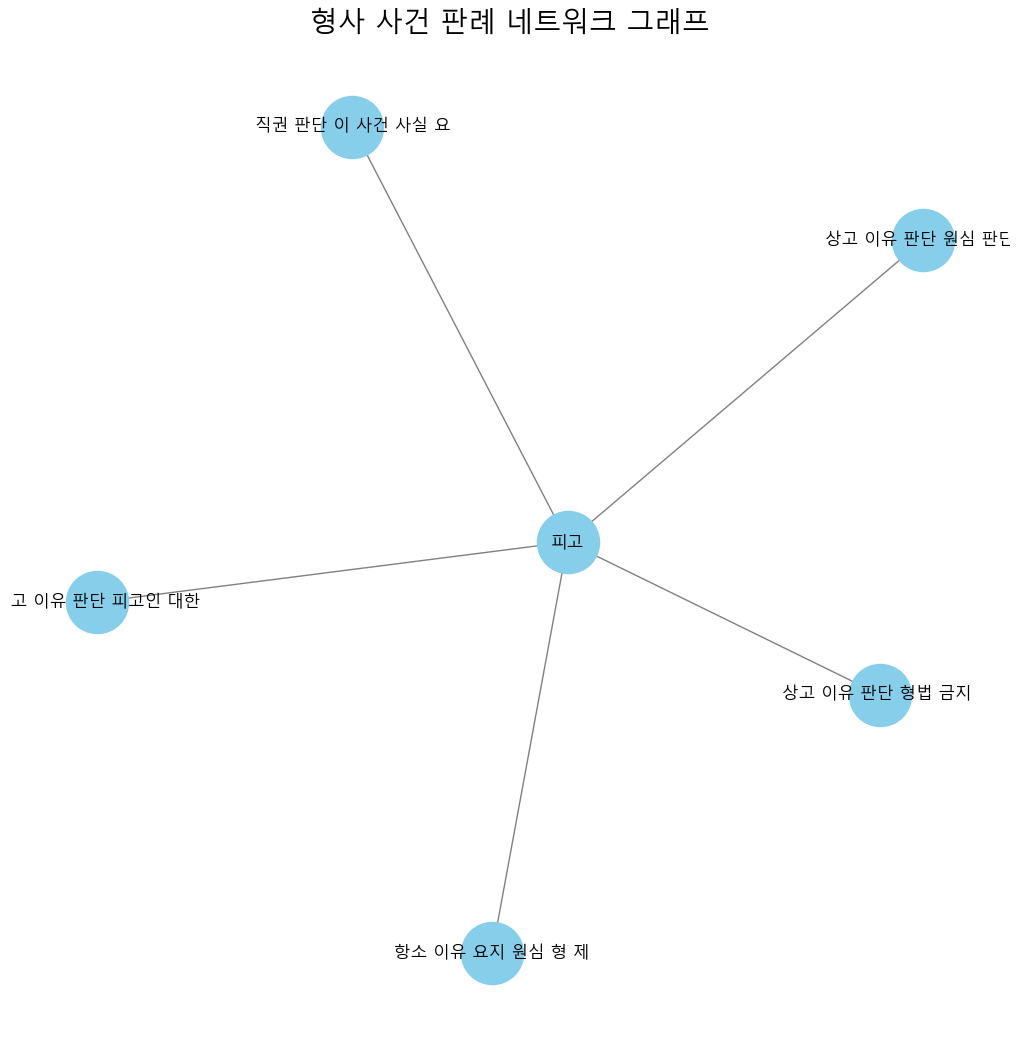

In [63]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import networkx as nx

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'AppleGothic'  # macOS

# 네트워크 그래프 생성 및 노드 추가는 이전 단계를 따릅니다.
# G = ... (네트워크 그래프 생성 및 노드 추가 코드)

# 그래프 시각화
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # 노드의 배치를 위한 Spring layout
labels = nx.get_node_attributes(G, '질문')  # 노드의 '질문' 속성을 라벨로 사용

nx.draw(G, pos, with_labels=True, labels=labels, font_family='Malgun Gothic', node_color='skyblue', edge_color='gray', node_size=2000, font_size=12)
plt.title('형사 사건 판례 네트워크 그래프', fontsize=20)
plt.show()
